<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

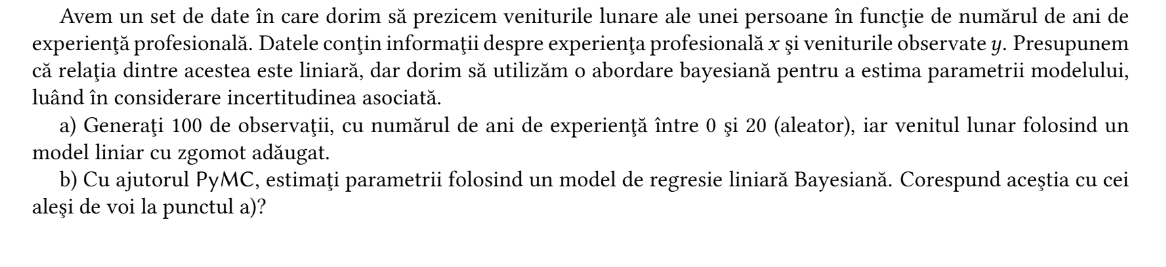

<ipython-input-23-f584f67ca805>:9: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  ani_random= np.random.random_integers(0,20)
<ipython-input-23-f584f67ca805>:11: DeprecationWarning: This function is deprecated. Please call randint(10, 1000 + 1) instead
  venit= 1000 + 400* ani_random+ np.random.random_integers(10,1000)


[16, 20, 16, 2, 9, 9, 5, 4, 20, 14, 2, 17, 2, 15, 8, 2, 13, 2, 3, 13, 10, 18, 4, 17, 19, 5, 0, 4, 18, 6, 11, 11, 1, 2, 7, 2, 7, 15, 9, 10, 13, 11, 8, 19, 17, 9, 15, 12, 15, 3, 14, 12, 10, 11, 19, 13, 19, 6, 1, 8, 11, 17, 1, 10, 18, 18, 6, 9, 16, 18, 13, 0, 14, 16, 8, 0, 16, 13, 11, 12, 13, 5, 14, 15, 13, 17, 19, 12, 13, 12, 10, 1, 13, 17, 6, 14, 15, 8, 8, 17]
[7480, 9829, 7838, 2065, 5521, 4963, 3545, 2686, 9949, 6938, 2772, 8505, 2237, 7666, 4490, 1816, 6855, 1974, 2910, 7058, 5291, 8441, 2944, 8259, 8984, 3175, 1612, 3140, 8639, 4392, 5563, 5708, 1913, 1925, 4101, 1952, 3891, 7561, 4739, 5083, 6944, 5896, 4968, 8886, 8593, 4783, 7899, 5942, 7253, 2866, 7432, 6355, 5955, 5829, 9383, 7034, 8964, 3479, 2287, 4755, 6037, 8083, 2190, 5244, 8592, 8389, 3477, 5271, 7899, 8576, 6466, 1941, 7031, 8261, 4917, 1046, 8237, 6372, 6141, 6617, 7118, 3314, 6932, 7374, 6819, 8306, 9262, 5982, 6956, 6173, 5376, 1910, 6809, 8328, 3974, 7531, 7534, 4831, 4381, 8798]


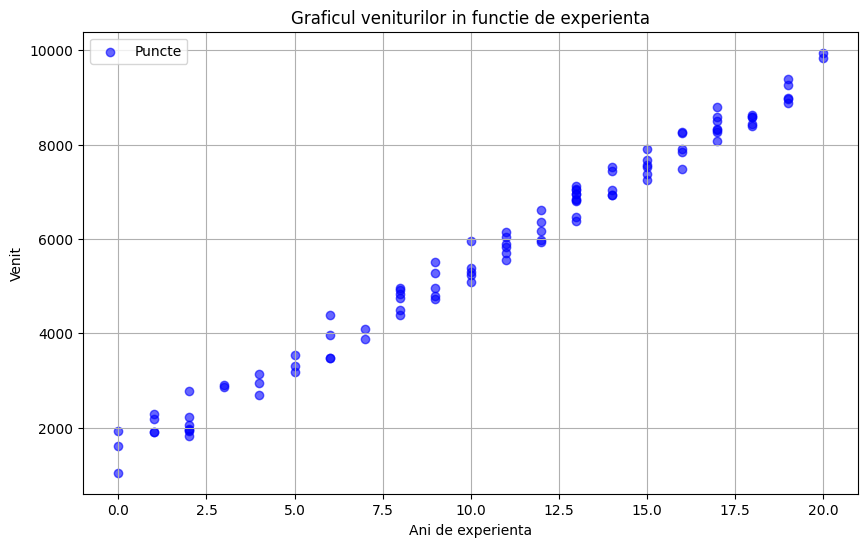

In [23]:
#a
import numpy as np
import matplotlib.pyplot as plt

ani_experienta=[]
venituri=[] #am modelat venitul cu un venit de baza 1000 si o crestere pe an de 400, cu deviatie standard de 500

for _ in range(100):
  ani_random= np.random.random_integers(0,20)
  ani_experienta.append(ani_random)
  venit= 1000 + 400* ani_random+ np.random.random_integers(10,1000)
  venituri.append(venit)

print(ani_experienta)
print(venituri)


plt.figure(figsize=(10, 6))
plt.scatter(ani_experienta, venituri, color='blue', alpha=0.6, label='Puncte')
plt.title('Graficul veniturilor in functie de experienta')
plt.xlabel('Ani de experienta')
plt.ylabel('Venit')
plt.grid(True)
plt.legend()
plt.show()


Output()

Output()


Intercept real: 5784.36
Panta reala : 407.17
Eroare reala: 277.21


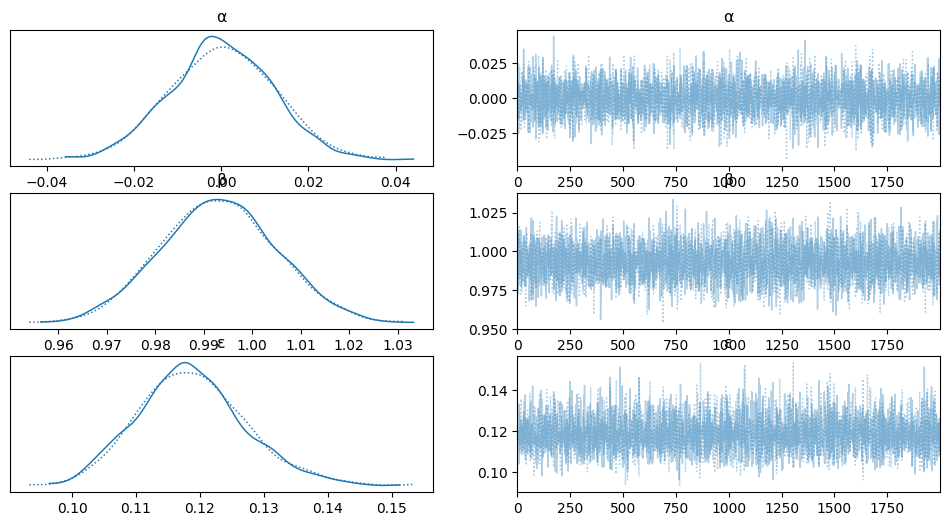

In [32]:
#b
import pymc as pm
import arviz as az
import pandas as pd

data = pd.DataFrame({'ani_experienta': ani_experienta, 'venituri': venituri})
ani_exp= data['ani_experienta']
venit= data['venituri']

ani_exp=(ani_exp - ani_exp.mean()) / ani_exp.std()
venit= (venit- venit.mean()) /venit.std()
#venit = alpha + beta *x
with pm.Model() as model_g:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=1)
  ε = pm.HalfCauchy('ε', 1)
  μ = pm.Deterministic('μ', α + β * ani_exp)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=venit)
  idata_g = pm.sample(2000, return_inferencedata=True)

print()
az.plot_trace(idata_g, var_names=['α', 'β', 'ε'])  #dupa standardizare

mean_x = data['ani_experienta'].mean()
std_x = data['ani_experienta'].std()
mean_y = data['venituri'].mean()
std_y = data['venituri'].std()

alpha_std = idata_g.posterior['α'].mean().item()
beta_std = idata_g.posterior['β'].mean().item()
epsilon_std = idata_g.posterior['ε'].mean().item()

beta_real = beta_std * (std_y / std_x) #beta_std= beta_real * std(x)/std(y)
alpha_real = alpha_std * std_y + mean_y
epsilon_real = epsilon_std * std_y #eroarea reprezinta variatia pe scara y

print(f"Intercept real: {alpha_real:.2f}")
print(f"Panta reala : {beta_real:.2f}")
print(f"Eroare reala: {epsilon_real:.2f}")

#raspuns: intercept init:1000 -> 1419; panta init:400 -> 407; eroare init:500 -> 276
